## We apply `scipy.ndimage.median_filter` and `scipy.ndimage.gaussian_filter`

In [72]:
%matplotlib inline

import sys
import datacube
from datacube.utils.cog import write_cog

from scipy import ndimage

import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

from osgeo import gdal

sys.path.append('../Scripts')
from deafrica_datahandling import wofs_fuser

In [3]:
dc = datacube.Datacube(app='scipy-gaussian_DEM')

In [4]:
# Define the central point of the area of interest
lat, lon = -19.85, 34.70

# buffer will define the upper and lower boundary from the central point
buffer = 0.1   

# Combine central lat, lon with buffer to get area of interest
lat_range = (lat - buffer, lat + buffer)
lon_range = (lon - buffer, lon + buffer)

In [59]:
# Create a query
dem30_query = {
    'x': (lon_range),
    'y': (lat_range),
    'output_crs': 'EPSG:2736',    # utm36s
    'resolution': (-30, 30)
}

#load elevation
elevation_array30 = dc.load(product ='srtm', **dem30_query)

#elevation_array

In [6]:
#convert to an dataArray (rather than Dataset) and select single time-slice
dem30 = elevation_array30[['elevation']].isel(time=0).to_array()

### `median_filter`

In [51]:
# does 5 mean an 5*5 
demMF = ndimage.median_filter(dem30.squeeze(), size=5, mode='mirror')

### `gaussian_filter`

In [77]:
dem1 = ndimage.gaussian_filter(demMF, sigma=1, mode='mirror', truncate=3)#dem30, sigma=1, mode='mirror', truncate=3)
dem2 = ndimage.gaussian_filter(demMF, sigma=2, mode='mirror', truncate=3)#dem30, sigma=2, mode='mirror', truncate=3)
dem3 = ndimage.gaussian_filter(demMF, sigma=3, mode='mirror', truncate=3)#dem30, sigma=3, mode='mirror', truncate=3)
dem4 = ndimage.gaussian_filter(demMF, sigma=4, mode='mirror', truncate=3)#dem30, sigma=4, mode='mirror', truncate=3)
dem5 = ndimage.gaussian_filter(demMF, sigma=5, mode='mirror', truncate=3)#dem30, sigma=5, mode='mirror', truncate=3)

In [78]:
print(dem30.size)
print(dem1.size)
print(dem2.size)
print(dem3.size)
print(dem4.size)
print(dem5.size)
print('')
print(dem30.squeeze().shape)
print(dem1.shape)
print(dem2.shape)
print(dem3.shape)
print(dem4.shape)
print(dem5.shape)

526676
526676
526676
526676
526676
526676

(746, 706)
(746, 706)
(746, 706)
(746, 706)
(746, 706)
(746, 706)


In [79]:
#create a DataArray object
da1 = xr.DataArray(data = dem1.squeeze(),
                   coords = {'y': dem30.y, 
                             'x': dem30.x},
                             #'spatial_ref': 2736},
                   #attrs = {'crs': 'EPSG:2736'},
                   dims = ["y", "x"])

da2 = xr.DataArray(data = dem2.squeeze(),
                   coords = {'y': dem30.y, 
                             'x': dem30.x},
                             #'spatial_ref': 2736},
                   #attrs = {'crs': 'EPSG:2736'},
                   dims = ["y", "x"])

da3 = xr.DataArray(data = dem3.squeeze(),
                   coords = {'y': dem30.y, 
                             'x': dem30.x},
                             #'spatial_ref': 2736},
                   #attrs = {'crs': 'EPSG:2736'},
                   dims = ["y", "x"])

da4 = xr.DataArray(data = dem4.squeeze(),
                   coords = {'y': dem30.y, 
                             'x': dem30.x},
                             #'spatial_ref': 2736},
                   #attrs = {'crs': 'EPSG:2736'},
                   dims = ["y", "x"])

da5 = xr.DataArray(data = dem5.squeeze(),
                   coords = {'y': dem30.y, 
                             'x': dem30.x},
                             #'spatial_ref': 2736},
                   #attrs = {'crs': 'EPSG:2736'},
                   dims = ["y", "x"])

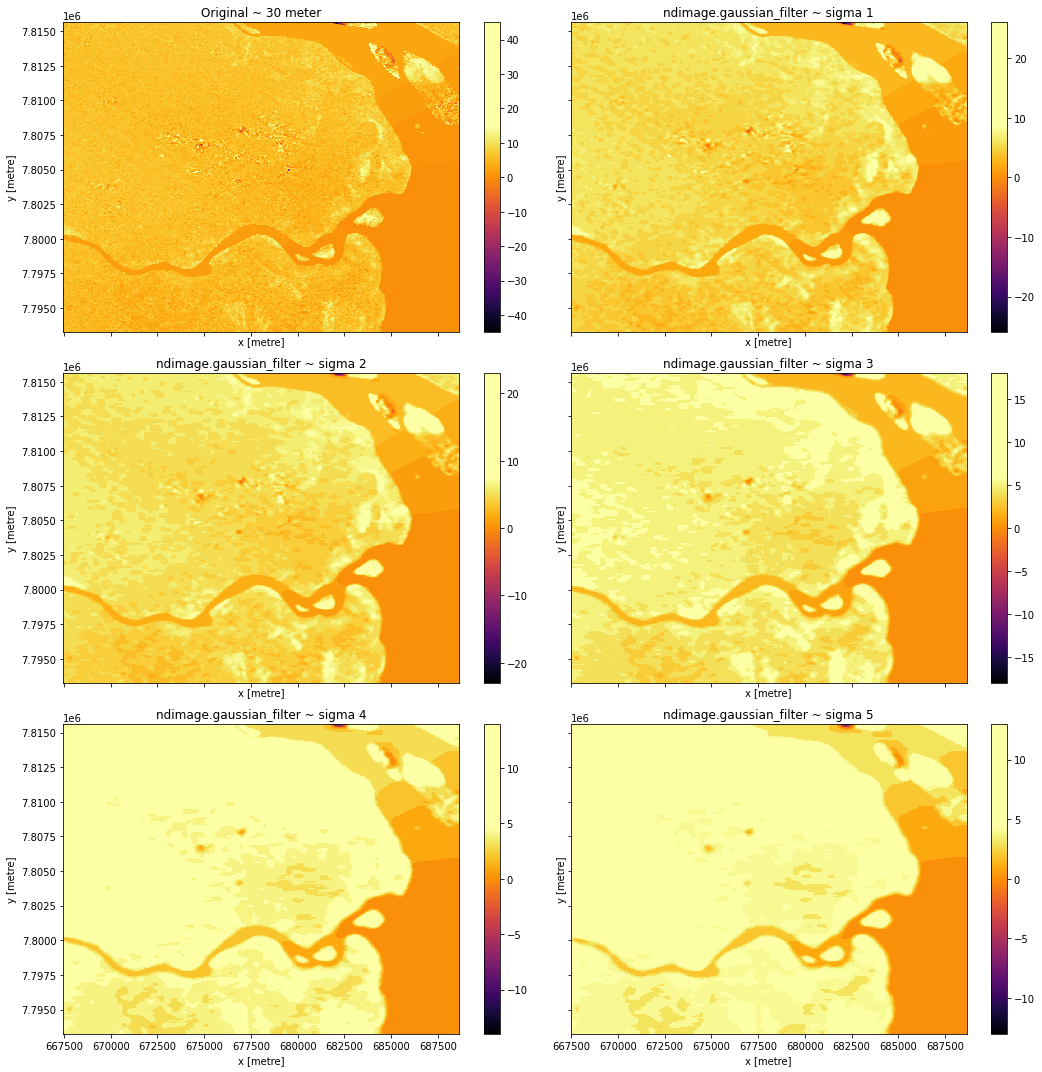

In [113]:
# Plot the elevation data
# Create a custom colourmap for the DEM
colors_terrain = plt.cm.inferno(np.linspace(0.0, 1.5, 25))
cmap_terrain = mpl.colors.LinearSegmentedColormap.from_list('inferno', colors_terrain)

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(321)
dem30.plot(ax=ax1, cmap=cmap_terrain)
ax1.set_title('Original ~ 30 meter')
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = fig.add_subplot(322, sharex=ax1, sharey=ax6)
da1.plot(ax=ax2, cmap=cmap_terrain)
ax2.set_title('ndimage.gaussian_filter ~ sigma 1')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

ax3= fig.add_subplot(323, sharex=ax5)
da2.plot(ax=ax3, cmap=cmap_terrain)
ax3.set_title('ndimage.gaussian_filter ~ sigma 2')
plt.setp(ax3.get_xticklabels(), visible=False)

ax4= fig.add_subplot(324, sharex=ax5, sharey=ax3)
da3.plot(ax=ax4, cmap=cmap_terrain)
ax4.set_title('ndimage.gaussian_filter ~ sigma 3')
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

ax5= fig.add_subplot(325)
da4.plot(ax=ax5, cmap=cmap_terrain)
ax5.set_title('ndimage.gaussian_filter ~ sigma 4')
#plt.setp(ax5.get_xticklabels(), visible=False)

ax6= fig.add_subplot(326, sharey=ax5)
da5.plot(ax=ax6, cmap=cmap_terrain)
ax6.set_title('ndimage.gaussian_filter ~ sigma 5')
plt.setp(ax6.get_yticklabels(), visible=False)

plt.tight_layout() 
plt.show()

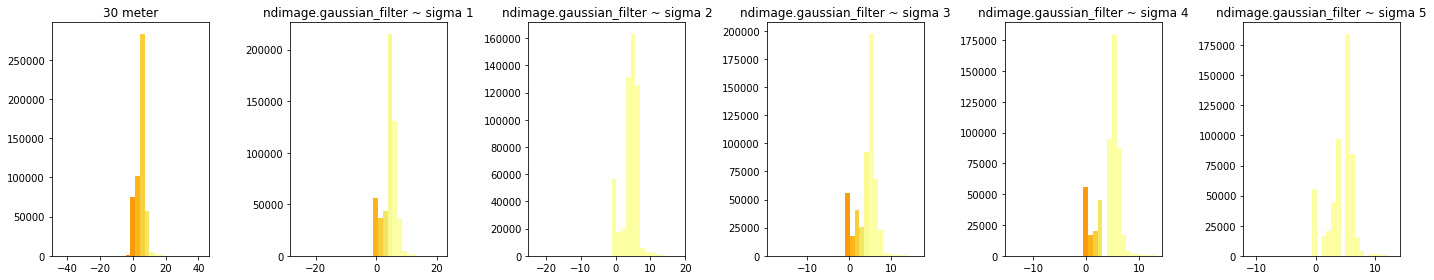

In [81]:
### Plot instance
f, ax = plt.subplots(1, 6, figsize=(20, 4))

# histogram.
n, bins, patches = dem30.squeeze().plot.hist(ax=ax[0],
                                           color="purple",
                                           bins=30)                 # feel free to change these 
ax[0].set_title('30 meter')
bin_centers = 0.8 * (bins[:-1] + bins[1:])
# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap_terrain(c))
    
# histogram.
n, bins2, patches = da1.plot.hist(ax=ax[1],
                                color="purple",
                                bins=30)                              # feel free to change these 
ax[1].set_title('ndimage.gaussian_filter ~ sigma 1')
bin_centers2 = 0.8 * (bins2[:-1] + bins2[1:])
# scale values to interval [0,1]
col2 = bin_centers2 - min(bin_centers2)
col2 /= max(col2)
for c, p2 in zip(col2, patches):
    plt.setp(p2, 'facecolor', cmap_terrain(c))

# histogram.
n, bins3, patches = da2.plot.hist(ax=ax[2],
                                color="purple",
                                bins=30)                              # feel free to change these 
ax[2].set_title('ndimage.gaussian_filter ~ sigma 2')
bin_centers3 = 0.8 * (bins3[:-1] + bins3[1:])
# scale values to interval [0,1]
col3 = bin_centers3 - min(bin_centers3)
col3 /= max(col2)
for c, p3 in zip(col3, patches):
    plt.setp(p3, 'facecolor', cmap_terrain(c))
    
# histogram.
n, bins4, patches = da3.plot.hist(ax=ax[3],
                                color="purple",
                                bins=30)                              # feel free to change these 
ax[3].set_title('ndimage.gaussian_filter ~ sigma 3')
bin_centers4 = 0.8 * (bins4[:-1] + bins4[1:])
# scale values to interval [0,1]
col4 = bin_centers4 - min(bin_centers4)
col4 /= max(col4)
for c, p4 in zip(col4, patches):
    plt.setp(p4, 'facecolor', cmap_terrain(c))
    
# histogram.
n, bins5, patches = da4.plot.hist(ax=ax[4],
                                color="purple",
                                bins=30)                              # feel free to change these 
ax[4].set_title('ndimage.gaussian_filter ~ sigma 4')
bin_centers5 = 0.8 * (bins5[:-1] + bins5[1:])
# scale values to interval [0,1]
col5 = bin_centers5 - min(bin_centers5)
col5 /= max(col5)
for c, p5 in zip(col5, patches):
    plt.setp(p5, 'facecolor', cmap_terrain(c))
    
# histogram.
n, bins6, patches = da5.plot.hist(ax=ax[5],
                                color="purple",
                                bins=30)                              # feel free to change these 
ax[5].set_title('ndimage.gaussian_filter ~ sigma 5')
bin_centers6 = 0.8 * (bins6[:-1] + bins6[1:])
# scale values to interval [0,1]
col6 = bin_centers6 - min(bin_centers6)
col6 /= max(col4)
for c, p6 in zip(col6, patches):
    plt.setp(p6, 'facecolor', cmap_terrain(c))
    
plt.tight_layout() 
plt.show()

### With to many plots it gets confusing.

We set a variable `size = 1, 2, 3, 4, or 5` and compare to the Original 30-meter strm.

In [82]:
variable = 3

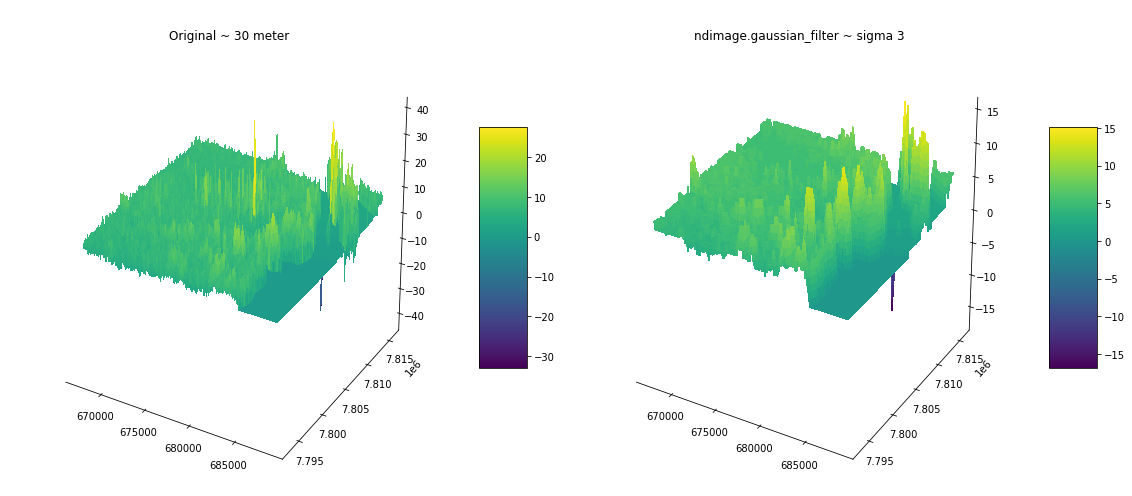

In [83]:
if variable == 1:
    view = da1
if variable == 2:
    view = da2
if variable == 3:
    view = da3
if variable == 4:
    view = da4
if variable == 5:
    view = da5

# set up a figure 
fig = plt.figure(figsize=(16, 7))

#transform the image
xres = elevation_array30.geobox.transform[0]
yres = elevation_array30.geobox.transform[4]
X = np.arange(dem30.geobox.transform[2], dem30.geobox.transform[2] + dem30.shape[1:][1]*xres, xres)
Y = np.arange(dem30.geobox.transform[5], dem30.geobox.transform[5] + dem30.shape[1:][0]*yres, yres)
X, Y = np.meshgrid(X, Y)

#do one image
ax1 = fig.add_subplot(121,projection='3d')

# make the panes transparent
ax1.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax1.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax1.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax1.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# plot a 3D surface --- oriented North West from the bottom right corner
surf1 = ax1.plot_surface(X, Y, dem30.squeeze(), rstride=2, cstride=2, cmap='viridis', linewidth=0, antialiased=False)
#w = ax.plot_surface(X,Y,w, rstride=2, cstride=2, color='b', linewidth=0, antialiased=True, zorder=1)
ax1.view_init(30, 300)
fig.colorbar(surf1, shrink=0.5, aspect=5)
ax1.set_title('Original ~ 30 meter')

#do another image
ax2 = fig.add_subplot(122,projection='3d')

# make the panes transparent
ax2.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax2.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax2.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax2.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# plot a 3D surface --- oriented North West from the bottom right corner
surf2 = ax2.plot_surface(X, Y, view.squeeze(), rstride=2, cstride=2, cmap='viridis', linewidth=0, antialiased=False)
#w = ax.plot_surface(X,Y,w, rstride=2, cstride=2, color='b', linewidth=0, antialiased=True, zorder=1)
ax2.view_init(30, 300)
fig.colorbar(surf2, shrink=0.5, aspect=5)
ax2.set_title('ndimage.gaussian_filter ~ sigma '+str(variable))

plt.tight_layout() 
plt.show()

### Inundation Senario with DEM after `median_filter(size=5)` and `gaussian_filter(sigma=3)`

In [84]:
flood_range = 7

In [85]:
mask = {}

for k in range(flood_range):
    mask[k] = da3 <= k

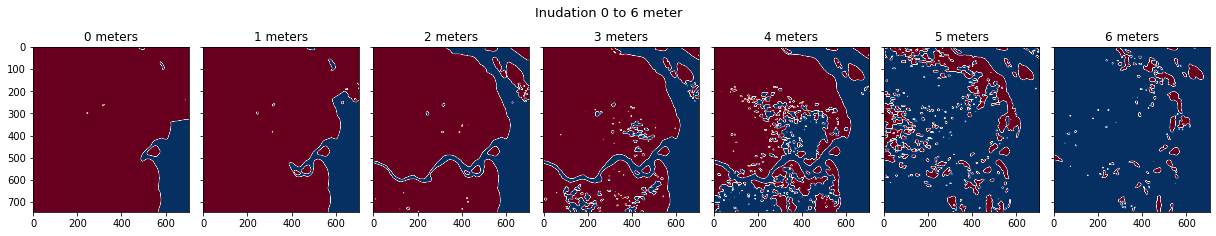

In [86]:
_, axs = plt.subplots(1, len(mask), figsize=(17, 17), sharey='row')
axs = axs.flatten()
for img, ax in zip(mask, axs):
    ax.imshow(mask[img].squeeze(), cmap='RdBu')
    ax.set_title(str(img) + ' meters')
    
plt.suptitle('Inudation 0 to 6 meter', size = 13, y = 0.6)
plt.tight_layout()
plt.show()

In [87]:
# Create a query
wofs_query = {
    'x': (lon_range),
    'y': (lat_range),
    'output_crs': 'EPSG:2736',    # utm36s
    'time': ('2018-01-01', '2018-12-30'),
    'resolution': (-30, 30)
}

# Load the data from the datacube
wofls = dc.load(product="ga_ls8c_wofs_2_annual_summary", group_by="solar_day",
                            fuse_func=wofs_fuser, **wofs_query)

In [88]:
mask_with90 = wofls.squeeze().frequency >= 0.9
mask_with90.values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True,  True, False]])

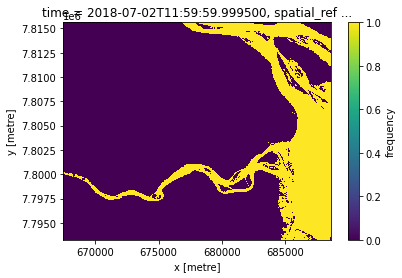

In [89]:
#plot
mask_with90.plot()

### New Inundation Senario with WOfS removed

In [90]:
new_mask = {}

for i in range(flood_range):
    new_mask[i] = mask[i].where(wofls.squeeze().frequency <= 0.9)

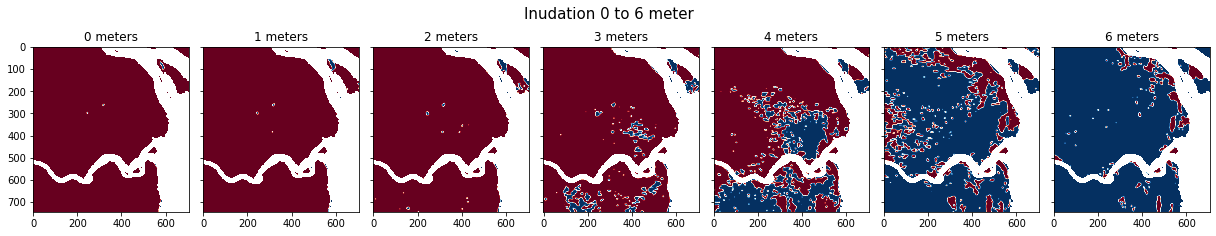

In [91]:
_, axs = plt.subplots(1, len(new_mask), figsize=(17, 17), sharey='row')
axs = axs.flatten()
for img, ax in zip(new_mask, axs):
    cb = ax.imshow(new_mask[img].squeeze(), cmap='RdBu')
    ax.set_title(str(img) + ' meters')

#plt.colorbar(cb)                                                      #perhaps a colorbar would be informative - add divider?
plt.suptitle('Inudation 0 to 6 meter', size = 15, y = 0.6)
plt.tight_layout()
plt.show()

### Compare with SAR ~ Sentinel 1: Beira_March 2019

In [92]:
#dataset = gdal.Open('../Supplementary_data/WorkingFolder/Beira_19032019_flooding.tif')#, gdal.GA_ReadOnly) 
dataset = gdal.Open('../Supplementary_data/WorkingFolder/beira_un-spider2.tif')
# Note GetRasterBand() takes band no. starting from 1 not 0
#band = dataset.GetRasterBand(1)
arr = dataset.ReadAsArray()

In [93]:
import matplotlib.gridspec as gridspec

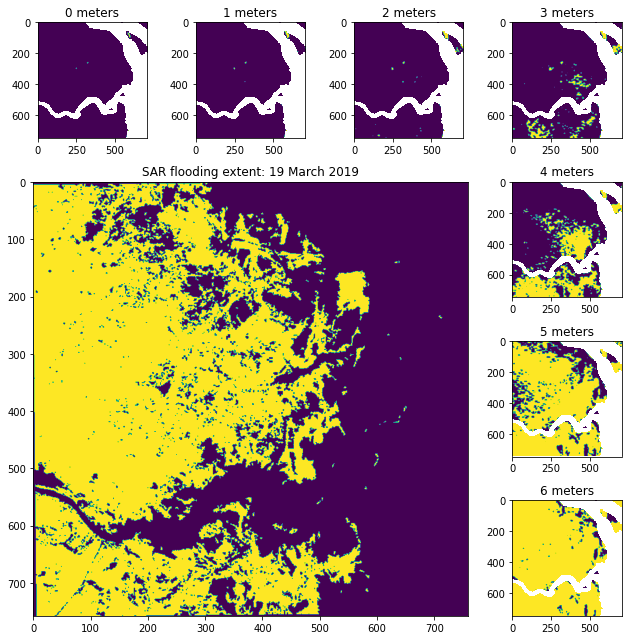

In [94]:
fig = plt.figure(figsize=(9, 9), constrained_layout=False)
a1 = plt.subplot2grid((4,4),(0,0))
a2 = plt.subplot2grid((4,4),(0,1))
a3 = plt.subplot2grid((4,4),(0,2))
a4 = plt.subplot2grid((4,4),(0,3))

a5 = plt.subplot2grid((4,4),(1,0), rowspan = 3, colspan = 3)

a6 = plt.subplot2grid((4,4),(1,3))
a7 = plt.subplot2grid((4,4),(2,3))
a8= plt.subplot2grid((4,4),(3,3))

a1.imshow(new_mask[0].squeeze())
a1.set_title('0 meters')
a2.imshow(new_mask[1].squeeze())
a2.set_title('1 meters')
a3.imshow(new_mask[2].squeeze())
a3.set_title('2 meters')
a4.imshow(new_mask[3].squeeze())
a4.set_title('3 meters')
a5.imshow(arr) #a1.set_title('exp')
#a5.imshow(mask_with90, zorder=2, alpha=0.3)
a5.set_title('SAR flooding extent: 19 March 2019')
a6.imshow(new_mask[4].squeeze())
a6.set_title('4 meters')
a7.imshow(new_mask[5].squeeze())
a7.set_title('5 meters')
a8.imshow(new_mask[6].squeeze())
a8.set_title('6 meters')

#plt.axes.xaxis.set_ticks([])
#plt.axes.yaxis.set_ticks([])
#plt.tick_labels('off')

plt.tight_layout()
plt.show()